In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib notebook
plt.set_loglevel('critical')
np.random.seed(1)

In [2]:
# change path to the label image you downloaded in chapter 1
path = '/home/dtward/data/mricloud_atlases/Adult27-55/Adt27-55_01_Adt27-55_01_FullLabels.img'
vol = nib.load(path)
I = np.array(vol.get_fdata().squeeze()).astype(np.uint16)


In [3]:
# flip it so it looks like it's in the right orientation
I = np.array(I.transpose((2,1,0))[::-1,::-1,::-1])

# Drawing 3D data

In [4]:
def draw(I,vmin=None,vmax=None,cmap=None,cbar=False,vsym=False):
    ''' 
    Draw an image as a sequence of slices in 3 planes.
    
    We assume the first dimension is for channels
    '''
    
    n_slices = 5

    if vmin is None:
        vmin = np.min(I)
    if vmax is None:
        vmax = np.max(I)
    if vsym:
        v = np.max(np.abs([vmin,vmax]))
        vmin = -v
        vmax = v
    if cmap is None:
        cmap = plt.cm.get_cmap('gray')
    elif isinstance(cmap,str):
        cmap = plt.cm.get_cmap(cmap)
    
    I = (I - vmin)/(vmax-vmin)    
    if I.shape[0] == 1:        
        I = cmap(I[0]).transpose(-1,0,1,2)[:3]
    elif I.shape[0] == 3:        
        pass
    else:
        raise Exception('must be 1 or 3 channels')
    
    
    
    fig = plt.figure()
    ax = []
    # sample across first axis
    slices = np.linspace(0,I.shape[-3]-1,n_slices+2)[1:-1].round().astype(int)    
    ax_ = []
    for i,s in enumerate(slices):
        ax__ = fig.add_subplot(3,n_slices,i+1)
        h = ax__.imshow(I[:,s].transpose(1,2,0),vmin=vmin,vmax=vmax,cmap=cmap)
        ax_.append(ax__)
    ax.append(ax_)
    
    # sample across second axis
    slices = np.linspace(0,I.shape[-2]-1,n_slices+2)[1:-1].round().astype(int)    
    ax_ = []
    for i,s in enumerate(slices):
        ax__ = fig.add_subplot(3,n_slices,i+1+n_slices)
        h = ax__.imshow(I[:,:,s].transpose(1,2,0),vmin=vmin,vmax=vmax,cmap=cmap)
        ax_.append(ax__)
    ax.append(ax_)
    
    # sample across third axis
    slices = np.linspace(0,I.shape[-1]-1,n_slices+2)[1:-1].round().astype(int)    
    ax_ = []
    for i,s in enumerate(slices):
        ax__ = fig.add_subplot(3,n_slices,i+1+n_slices*2)
        h = ax__.imshow(I[:,:,:,s].transpose(1,2,0),vmin=vmin,vmax=vmax,cmap=cmap)
        ax_.append(ax__)
    ax.append(ax_)
    
    
    ax = np.array(ax)
    if cbar:
        fig.colorbar(h,ax=ax)
    return fig,ax
    
    

<IPython.core.display.Javascript object>


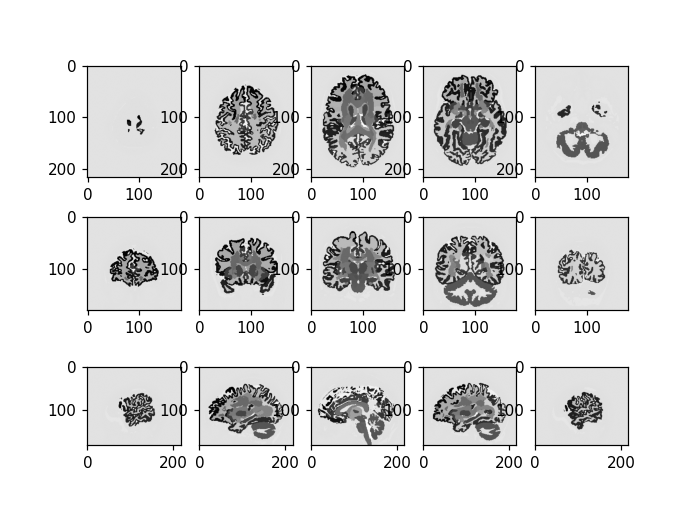

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [5]:
draw(I[None])

# Generating a random brain image

In [6]:
ontology = '/home/dtward/data/mricloud_atlases/Adult27-55/multilevel_lookup_table.txt'
WM = []
GM = []
OTHER = []
VL = []
CSF = []
SUL = []
structure_from_id = {}
with open(ontology) as f:
    for line in f:
        if line.startswith('Level'): continue
        line = line.strip()
        if not line: continue
        if 'WhiteMatter' in line:
            WM.append(int(line.split('\t')[0]))
        elif 'Ventricle' in line:
            VL.append(int(line.split('\t')[0]))
        elif 'Sulcus' in line:
            SUL.append(int(line.split('\t')[0]))
        elif 'CSF' in line:
            CSF.append(int(line.split('\t')[0]))
        elif 'xxxx' in line:
            OTHER.append(int(line.split('\t')[0]))
        else:
            GM.append(int(line.split('\t')[0]))
        print(line.split()[:2])
        structure_from_id[int(line.split()[0])] = line.split()[1]

['1', 'SFG_L']
['2', 'SFG_R']
['3', 'SFG_PFC_L']
['4', 'SFG_PFC_R']
['5', 'SFG_pole_L']
['6', 'SFG_pole_R']
['7', 'MFG_L']
['8', 'MFG_R']
['9', 'MFG_DPFC_L']
['10', 'MFG_DPFC_R']
['11', 'IFG_opercularis_L']
['12', 'IFG_opercularis_R']
['13', 'IFG_orbitalis_L']
['14', 'IFG_orbitalis_R']
['15', 'IFG_triangularis_L']
['16', 'IFG_triangularis_R']
['17', 'LFOG_L']
['18', 'LFOG_R']
['19', 'MFOG_L']
['20', 'MFOG_R']
['21', 'RG_L']
['22', 'RG_R']
['23', 'PoCG_L']
['24', 'PoCG_R']
['25', 'PrCG_L']
['26', 'PrCG_R']
['27', 'SPG_L']
['28', 'SPG_R']
['29', 'SMG_L']
['30', 'SMG_R']
['31', 'AG_L']
['32', 'AG_R']
['33', 'PrCu_L']
['34', 'PrCu_R']
['35', 'STG_L']
['36', 'STG_R']
['37', 'STG_L_pole']
['38', 'STG_R_pole']
['39', 'MTG_L']
['40', 'MTG_R']
['41', 'MTG_L_pole']
['42', 'MTG_R_pole']
['43', 'ITG_L']
['44', 'ITG_R']
['45', 'PHG_L']
['46', 'PHG_R']
['47', 'ENT_L']
['48', 'ENT_R']
['49', 'FuG_L']
['50', 'FuG_R']
['51', 'SOG_L']
['52', 'SOG_R']
['53', 'MOG_L']
['54', 'MOG_R']
['55', 'IOG_L']
['56'

In [7]:
labels = np.unique(I)

In [8]:
from scipy.ndimage import gaussian_filter

In [9]:
def generate_brain(I,gmean=1.0,gstd=0.1,wmean=2.0,wstd=0.1,noise=0.5,blur=1.5,affected=[],shift=[]):
    '''
    '''
    J = np.zeros(I.shape)
    for l in labels:
        mask = I==l
        if l in WM:
            J[mask] = wmean + np.random.randn()*wstd
        elif l in GM:
            J[mask] = gmean + np.random.randn()*gstd
    for l,s in zip(affected,shift):
        mask = I==l
        J[mask] += s
            
    J += np.random.randn(*J.shape)*noise

    
    
    # now we blur
    Jb = gaussian_filter(J,blur)

    return Jb


<IPython.core.display.Javascript object>


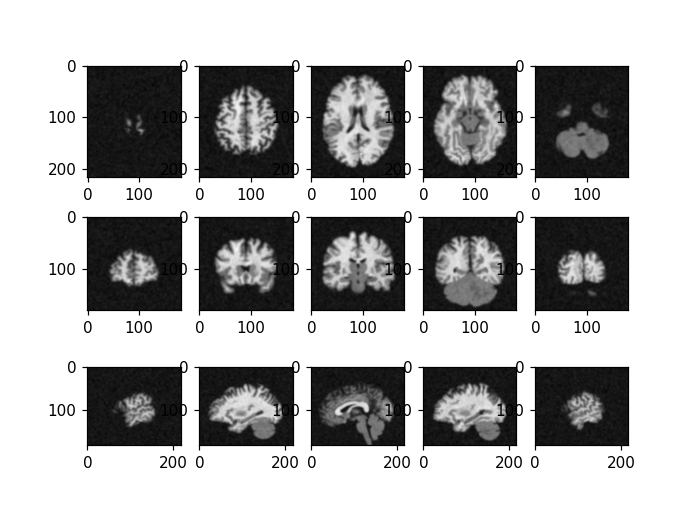

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [10]:
# generate some image data
# gray matter gray, white matter white, csf/background black
# a bit of blur
Jb = generate_brain(I)
draw(Jb[None])

affected structures ['Hippo_L', 'Hippo_R']


<IPython.core.display.Javascript object>


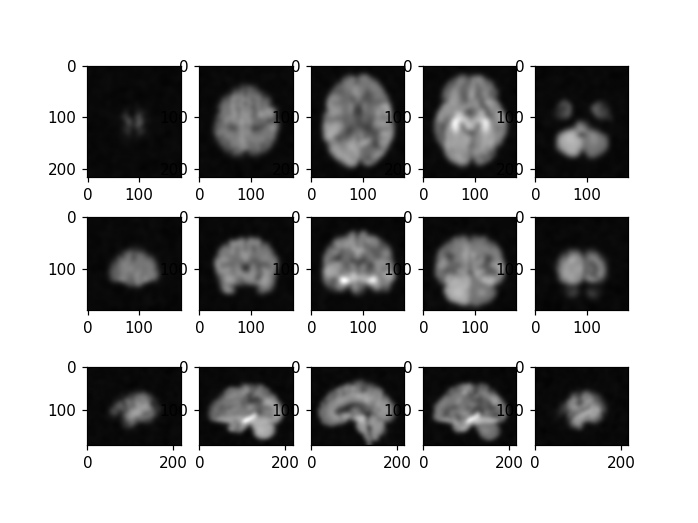

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [11]:
# simulate an fmri signal
# this will be a blurry image
# gray matter structures will generally have a stronger signal than white matter structures
# structures 75 and 76 (hippocampus) will have a stronger signal
affected = [75,76]
shift = [0.7,0.5]

print(f'affected structures {[structure_from_id[a] for a in affected]}')

Fb = generate_brain(I,wmean=0.25,wstd=0.1,gmean=0.5,gstd=0.1,blur=5.0,noise=0.3,affected=affected,shift=shift)
draw(Fb[None])

In [12]:
# make some colormaps
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('blackred',['black','red'])
cmap_r = LinearSegmentedColormap.from_list('redblack',['red','black'])
cmap2 = LinearSegmentedColormap.from_list('blueblackred',['blue','black','red'])

<IPython.core.display.Javascript object>


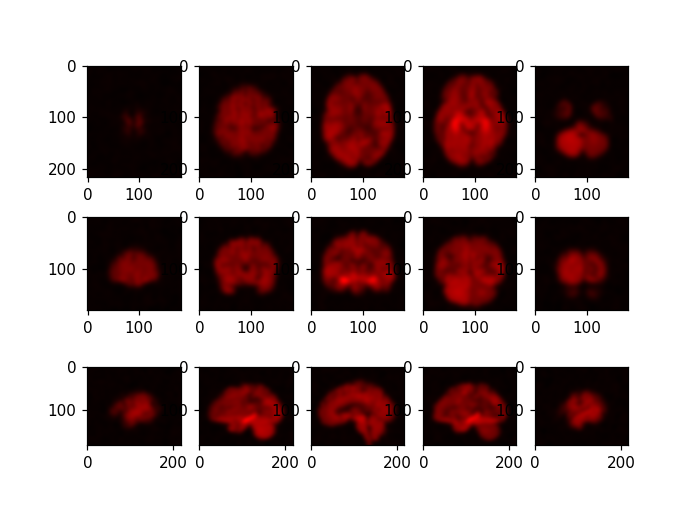

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [13]:
draw(Fb[None],cmap=cmap)

In [14]:
# combine MRI with fmri signal

def toRGB(Jb,Fb):
    # convert both images to RGB using colormaps
    FbRGB = cmap(Fb/np.max(Fb))[...,:3]
    JbRGB = plt.cm.gray(Jb/np.max(Jb))[...,:3]
    # we use the magnitude of the fmri signal to seg the transparency alpha
    power = 2.0
    alpha = (Fb/np.max(Fb))**power
    # blend them together using the transparency value
    RGB = FbRGB*alpha[...,None] + JbRGB*(1-alpha[...,None])
    return RGB



In [15]:
RGB = toRGB(Jb,Fb)

<IPython.core.display.Javascript object>


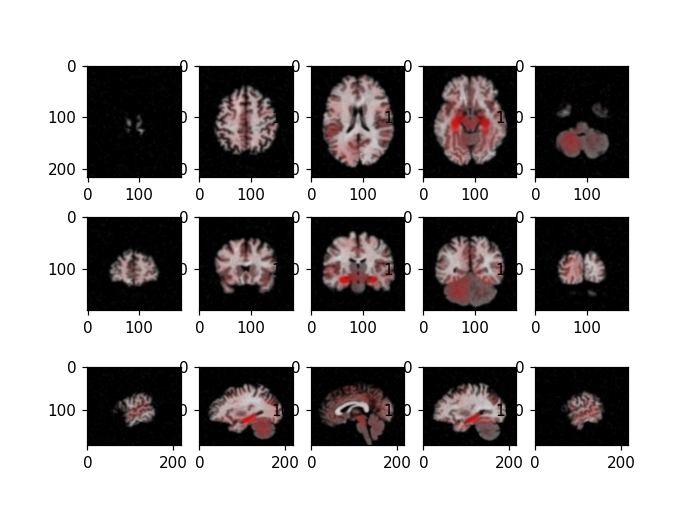

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [16]:
draw(RGB.transpose(-1,0,1,2),vmin=0,vmax=1)

# Create a sample for statistical testing



<IPython.core.display.Javascript object>


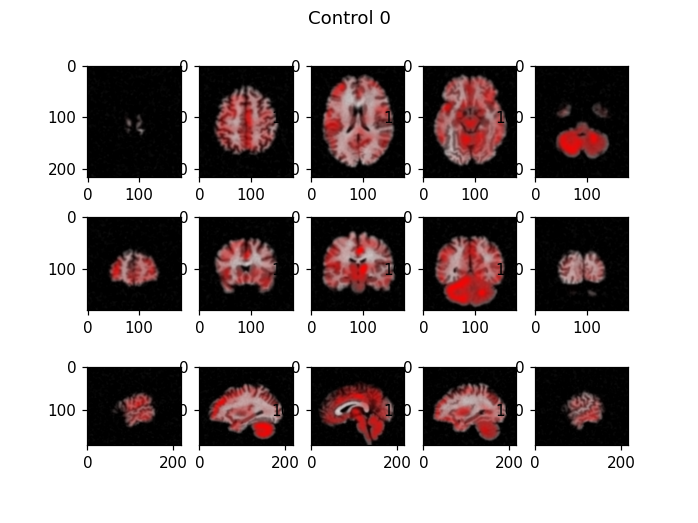

<IPython.core.display.Javascript object>


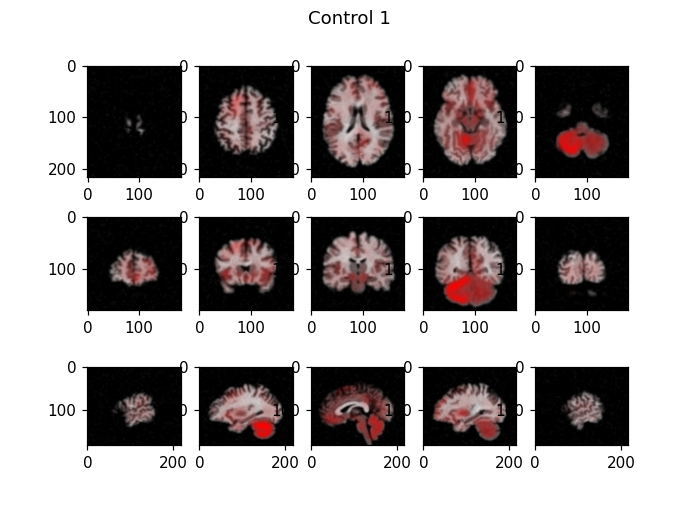

<IPython.core.display.Javascript object>


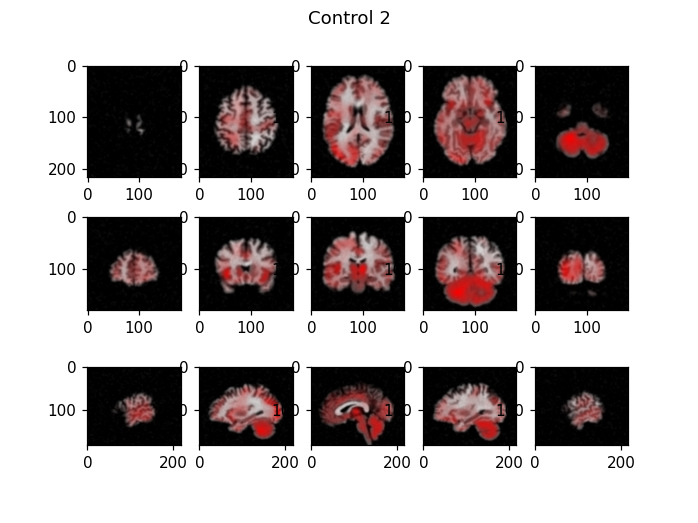

<IPython.core.display.Javascript object>


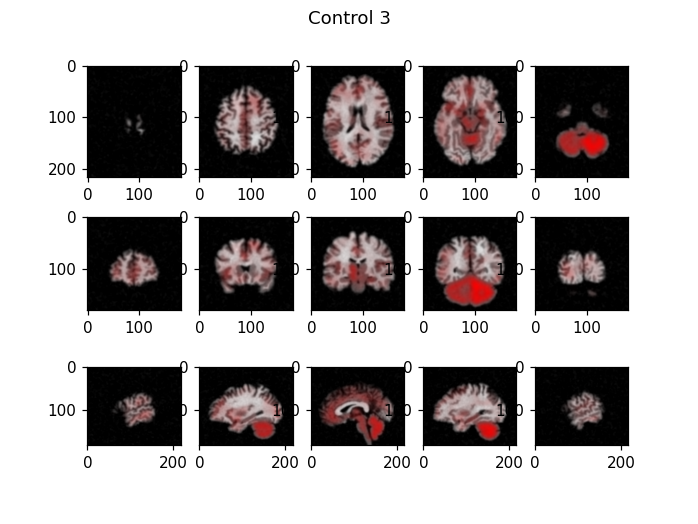

<IPython.core.display.Javascript object>


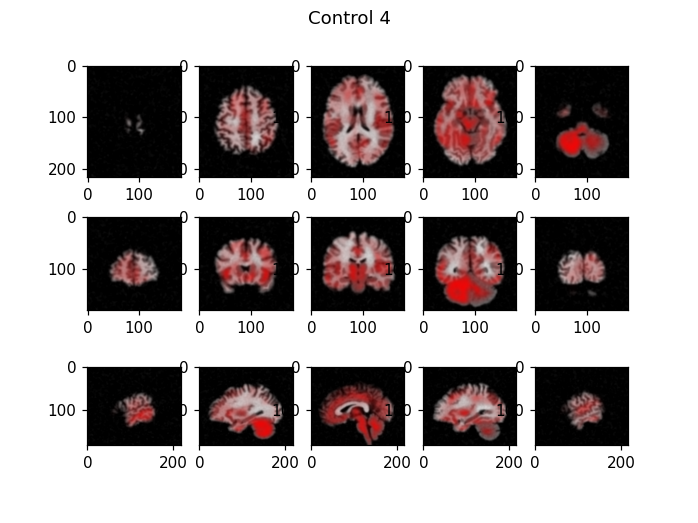

<IPython.core.display.Javascript object>


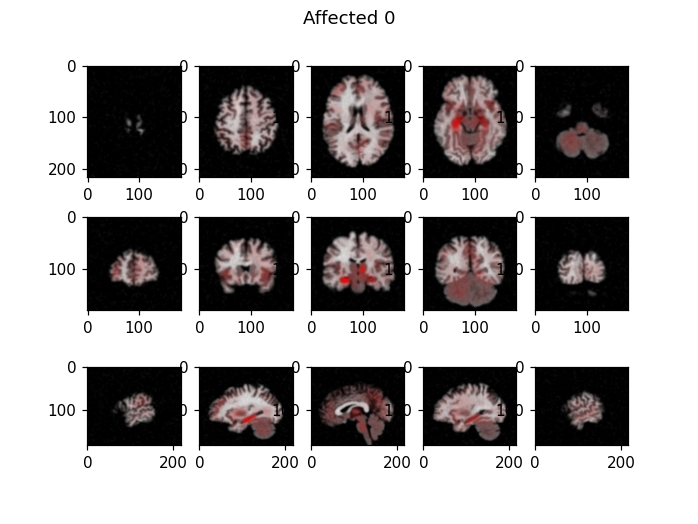

<IPython.core.display.Javascript object>


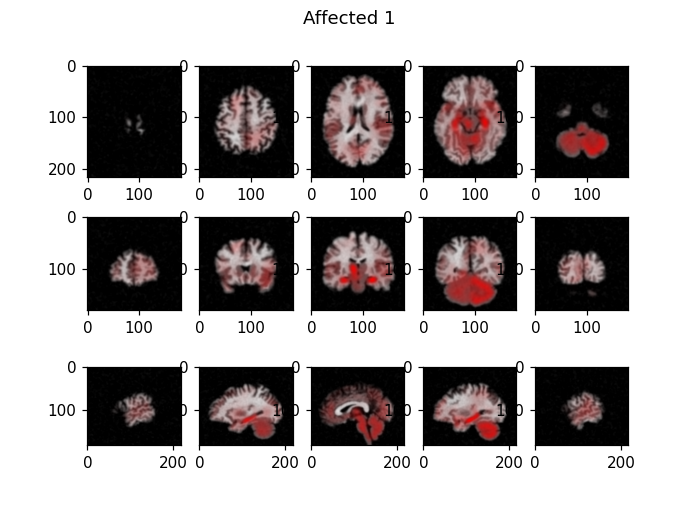

<IPython.core.display.Javascript object>


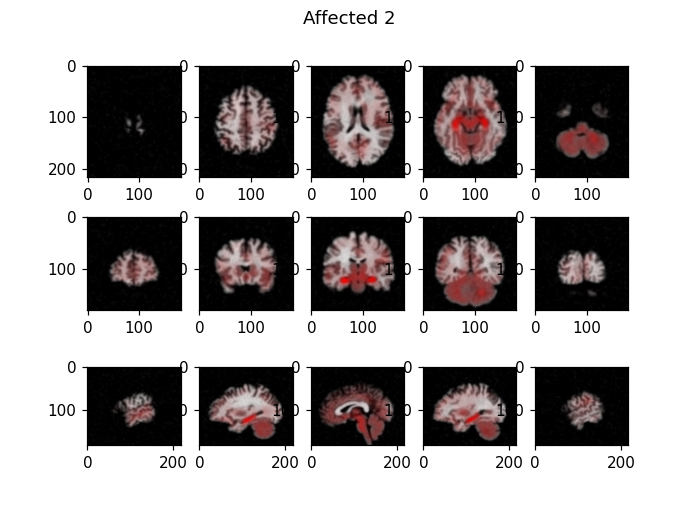

<IPython.core.display.Javascript object>


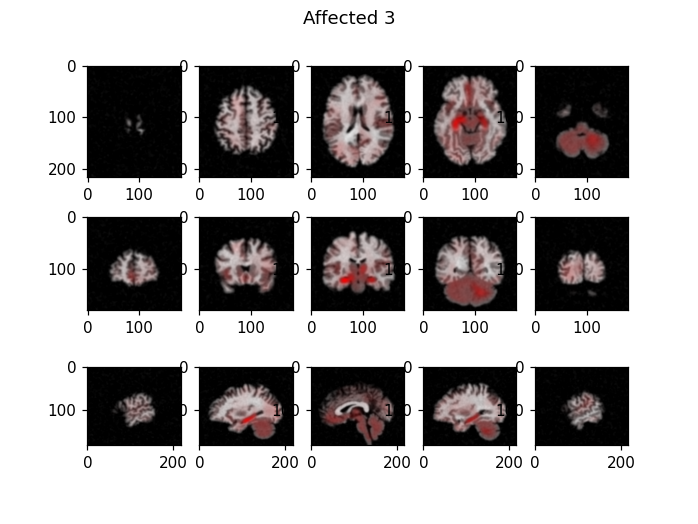

<IPython.core.display.Javascript object>


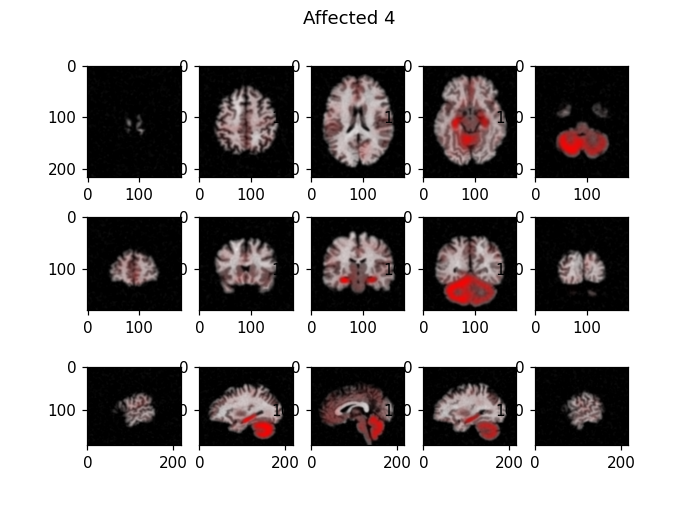

In [17]:
# N0 patients from the "control group"
# they will not have any structures with a stronger signal
N0 = 5
# N1 patients from the "affected group"
# they will have a stronger signal in hippocampus
N1 = 5



I0 = []
for i in range(N0):
    I0.append(generate_brain(I,wmean=0.25,wstd=0.1,gmean=0.5,gstd=0.1,blur=5.0,noise=0.3))
    RGB = toRGB(Jb,I0[-1])
    fig,ax = draw(RGB.transpose(-1,0,1,2))
    fig.suptitle(f'Control {i}')
    fig.canvas.draw()
I0 = np.stack(I0,-1)    
    
I1 = []
for i in range(N1):
    I1.append(generate_brain(I,wmean=0.25,wstd=0.1,gmean=0.5,gstd=0.1,blur=5.0,noise=0.3,affected=affected,shift=shift))    
    RGB = toRGB(Jb,I1[-1])
    fig,ax = draw(RGB.transpose(-1,0,1,2))
    fig.suptitle(f'Affected {i}')
    fig.canvas.draw()
I1 = np.stack(I1,-1)

# Fit our data to two models at each pixel

We will carry out a mass univariate analysis.  At each pixel we'll fit our data

H0: one mean per pixel, regardless of the group.

H1: two means per pixel, with different means for the control and affected group.

We will use a linear least squares model in each case (i.e. corresponding to maximum likelihood estimation for Gaussians with unknown mean and variance)

In [18]:
# stack up our data, so the last dimension is N = N0+N1
X = np.concatenate((I0,I1),-1)
G = np.arange(N0+N1) >= N0
print(X.shape,G.shape)

(181, 217, 181, 10) (10,)


In [19]:
# create a design matrix for model 0
# In our model, we express the mean signal as a linear combination of some functions
# The design matrix stores the value of these functions for each patient
# Here there is only one row, which contains the number 1 to represent a mean
# other possibilities are functions of the group id
# demographic info like age, weight, sex, etc.
D = np.ones((1,N0+N1))
print(D.shape)

(1, 10)


In [20]:
# solve for the unknown coefficients in our linear model
# we use the pseudoinverse of D
DD = D@D.T
XD = X@D.T
coeffs = np.linalg.solve(DD,XD[...,None])[...,0]
print(coeffs.shape)
# the result is one number for each pixel
# this number is the mean fmri signal at each pixel

(181, 217, 181, 1)


<IPython.core.display.Javascript object>


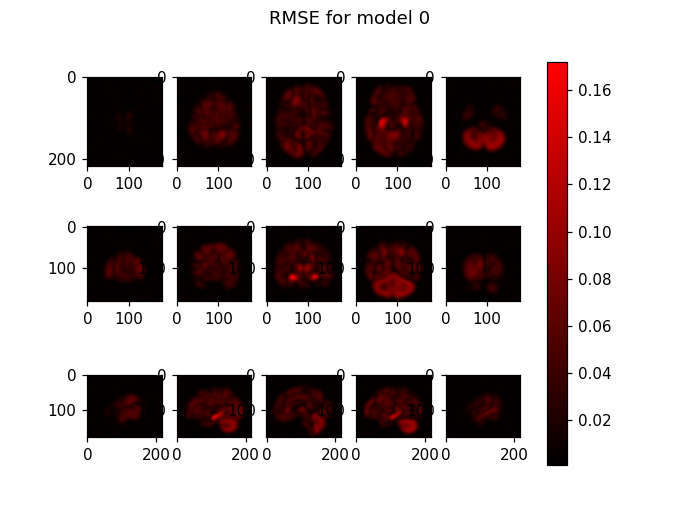

Text(0.5, 0.98, 'RMSE for model 0')

In [21]:
# get the mean square error
# this is a linear model, so we can predict the mean with matrix multiplication
Xhat = coeffs@D
# root mean square error is the difference between our prediction and the real data
RMSE0 = np.sqrt(np.mean( (X-Xhat)**2 ,-1))
fig,ax = draw(RMSE0[None],cmap=cmap,cbar=True)
fig.suptitle('RMSE for model 0')

<IPython.core.display.Javascript object>


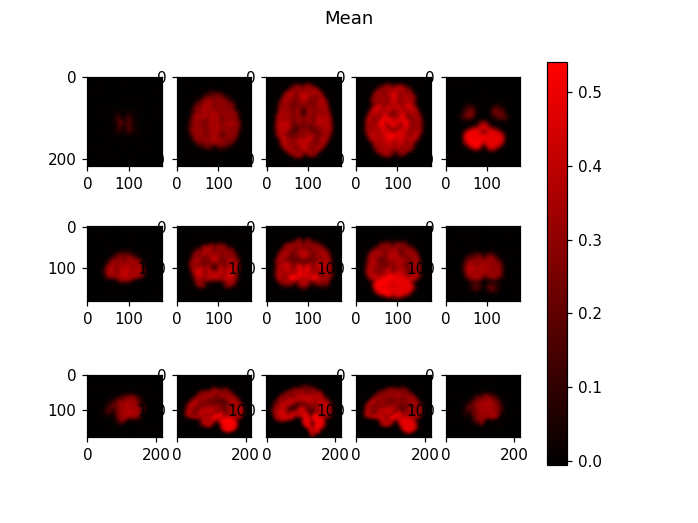

Text(0.5, 0.98, 'Mean')

In [22]:
# let's see what the mean signal actually looks like
fig,ax = draw(coeffs[None,...,0],cmap=cmap,cbar=True)
fig.suptitle('Mean')

In [23]:
# create our design matrix for model 1
D = np.stack([np.ones(N0+N1),G],0)
print(D.shape)
# our design matrix now has two rows
# the first function is the constant 1
# the second function is the group label G
# the mean for patient i at voxel j is:
# mu_{ij} = a_{ij} + G_i b_{ij}


(2, 10)


In [24]:
# use the pseudoinverse to solve for unknown coefficients
DD = D@D.T
XD = X@D.T
coeffs = np.linalg.solve(DD,XD[...,None])[...,0]
print(coeffs.shape)
# the result is two number for each pixel
# the first number is the mean fmri signal at each pixel for group 0
# the second is the difference in means between group 1 and group 0

(181, 217, 181, 2)


<IPython.core.display.Javascript object>


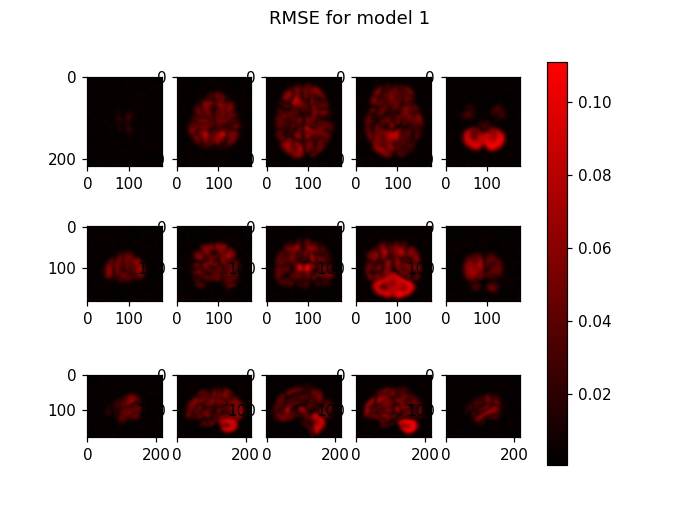

Text(0.5, 0.98, 'RMSE for model 1')

In [25]:
# get the mean square error
# since this is a linear model we can calculated the mean using matrix multiplication
Xhat = coeffs@D
RMSE1 = np.sqrt(np.mean( (X-Xhat)**2 ,-1))
fig,ax = draw(RMSE1[None],cmap=cmap,cbar=True)
fig.suptitle('RMSE for model 1')
# notice the error in the hippocampus is a lot smaller!
# does model 1 give a better fit than model 2?

<IPython.core.display.Javascript object>


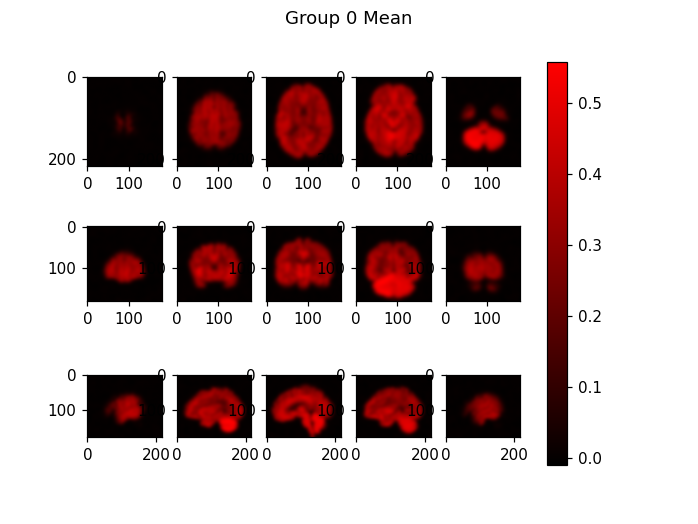

<IPython.core.display.Javascript object>


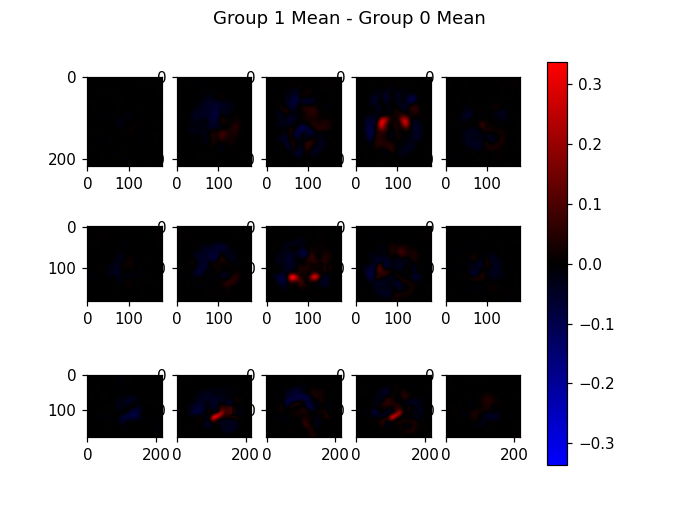

Text(0.5, 0.98, 'Group 1 Mean - Group 0 Mean')

In [26]:
# have a look at the parameters
fig,ax = draw(coeffs[None,...,0],cmap=cmap,cbar=True)
fig.suptitle('Group 0 Mean')

fig,ax = draw(coeffs[None,...,1],cmap=cmap2,cbar=True,vsym=True)
fig.suptitle('Group 1 Mean - Group 0 Mean')

/home/dtward/.local/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


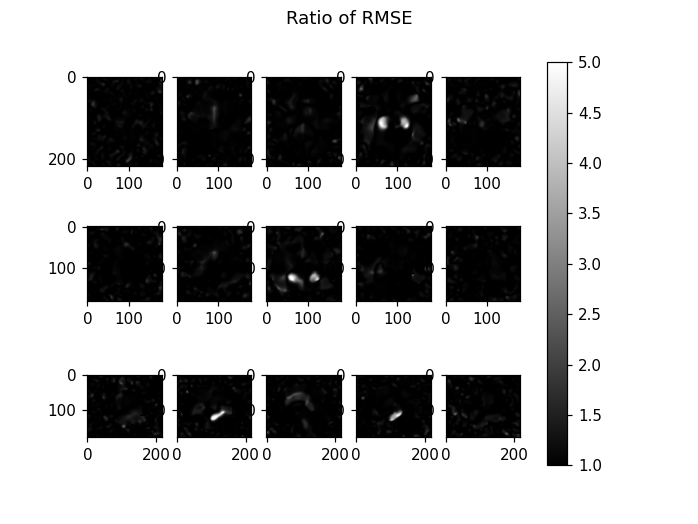

Text(0.5, 0.98, 'Ratio of RMSE')

In [27]:
# compute our test statistic, called Tstar
# this is a simple transform of the likelihood ratio
# it is related to an F statistic, but we don't have to worry about getting the normalization right
# or counting the degrees of freedom, etc.
# when doing permutations, we just have to calculate it in the same way
Tstar = (RMSE0/RMSE1)
fig,ax = draw(Tstar[None],vmin=1,vmax=5,cbar=True)
fig.suptitle('Ratio of RMSE')
# pretty strong signal in the hippocampus!
# but is it enough?

<IPython.core.display.Javascript object>


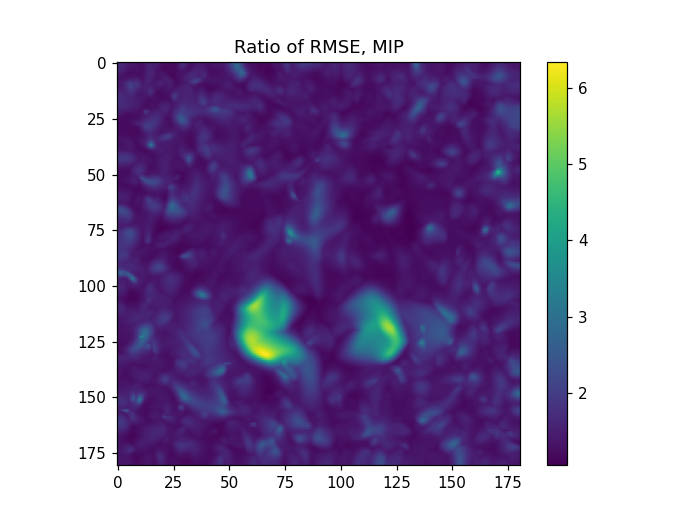

In [28]:
# look at a maximum intensity projection
fig,ax = plt.subplots()
h = ax.imshow(np.max(Tstar,1))
ax.set_title('Ratio of RMSE, MIP')
fig.colorbar(h)
# we see that there are lots of bright signals that occur by random chance
# but a lot of them are in the background

<IPython.core.display.Javascript object>


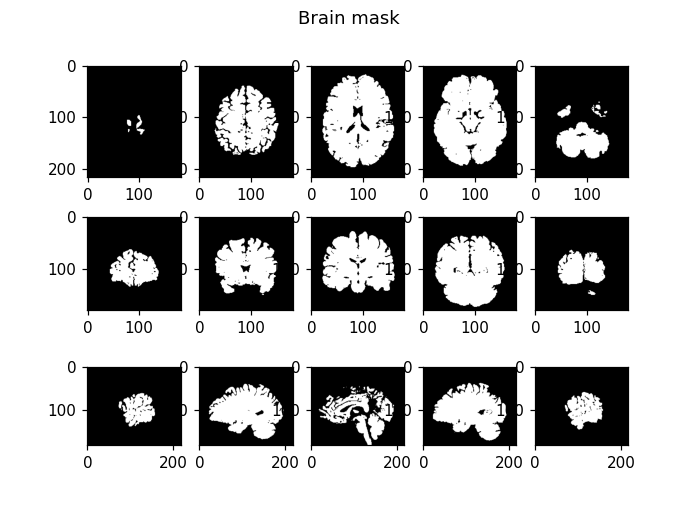

<IPython.core.display.Javascript object>


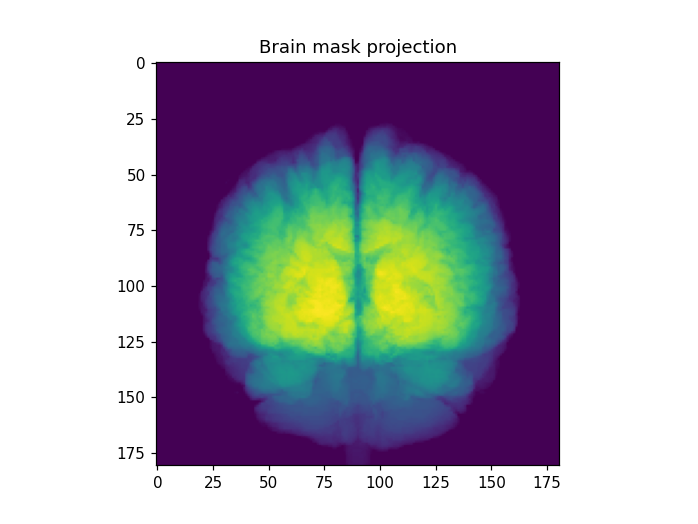

Text(0.5, 1.0, 'Brain mask projection')

In [29]:
# let's do statistical testing only inside the brain, not the air
# so we'll get a brain mask for gray matter and white matter
# this can help with computation speed when we do lots of permutations
# and deal with unwanted signal in the background
mask = np.zeros_like(I)
for l in GM:
    mask = np.logical_or(mask,I==l)
for l in WM:
    mask = np.logical_or(mask,I==l)
fig,ax = draw(mask[None]*1.0)
fig.suptitle('Brain mask')
fig,ax = plt.subplots()
ax.imshow(np.sum(mask,1))
ax.set_title('Brain mask projection')

<IPython.core.display.Javascript object>


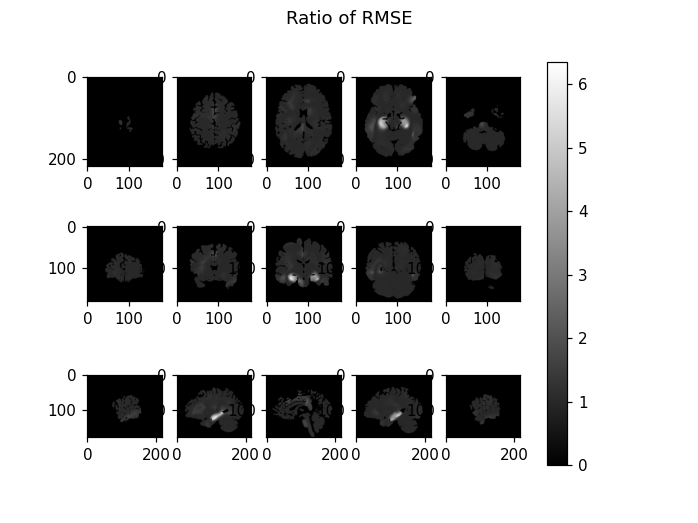

Text(0.5, 0.98, 'Ratio of RMSE')

In [30]:
# show or statistic multiplied by the mask
Tstar = (RMSE0/RMSE1)*mask
fig,ax = draw(Tstar[None],cbar=True)
fig.suptitle('Ratio of RMSE')

<IPython.core.display.Javascript object>


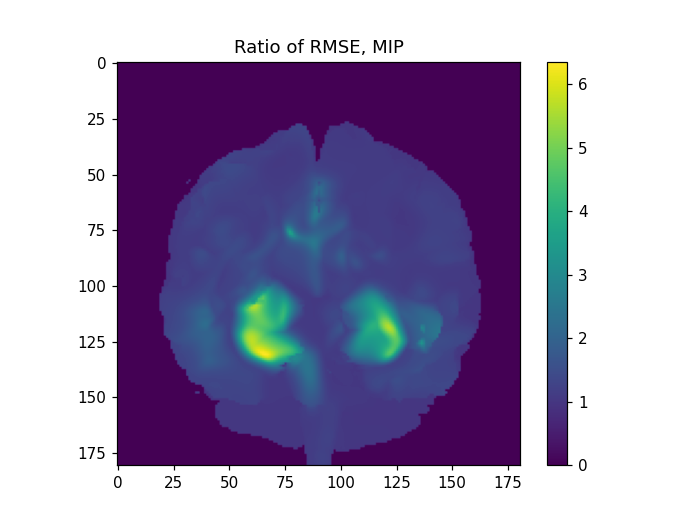

In [31]:
# look at MIP again
fig,ax = plt.subplots()
h = ax.imshow(np.max(Tstar,1))
ax.set_title('Ratio of RMSE, MIP')
fig.colorbar(h)
# way fewer bright signals now
# the background fluctuations probably come from "divide by zero" issues

# Now do permutation testing

<IPython.core.display.Javascript object>


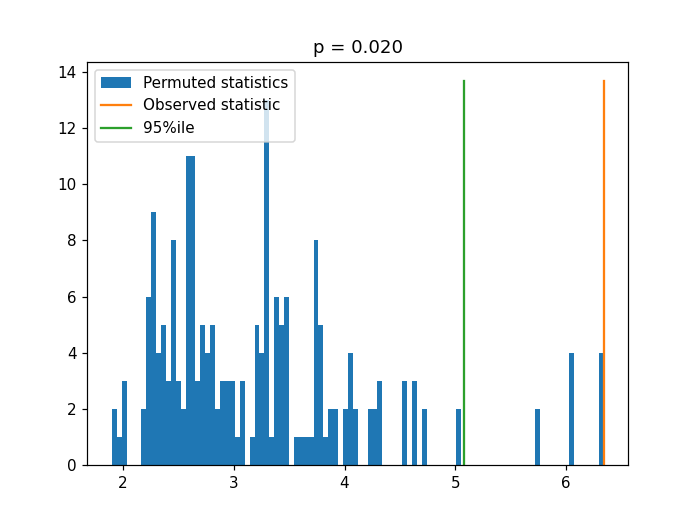

In [32]:
# save the true maximum statistic
# we'll compare this to the maximum of our permutations
Tstarmax = np.max(Tstar*mask)
nperm = 200
Tpermmax = []
fig,ax = plt.subplots()
Xm = X[mask]

# we'll create an image of p values
Puncorrected = np.zeros_like(I*1.0)
Pfwer = np.zeros_like(I*1.0)
for it in range(nperm):
    # permute the group labels
    Gp = np.random.permutation(G)
    
    # fit H0
    # note that this is the same regardless of permutations
    # we could save time by using the value we already calculated
    if it == 0:
        D = np.ones((1,N0+N1))
        DD = D@D.T
        XD = Xm@D.T
        coeffs = np.linalg.solve(DD,XD[...,None])[...,0]
        Xhat = coeffs@D
        RMSE0 = np.sqrt(np.mean( (Xm-Xhat)**2 ,-1))
    
    # fit H1
    D = np.stack([np.ones(N0+N1),Gp],0)
    DD = D@D.T
    XD = Xm@D.T
    coeffs = np.linalg.solve(DD,XD[...,None])[...,0]
    Xhat = coeffs@D
    RMSE1 = np.sqrt(np.mean( (Xm-Xhat)**2 ,-1))
    
    # define our statistic
    Tperm = (RMSE0/RMSE1)
    
    # get the maximum and store it in a list    
    Tpermmax.append(np.max(Tperm))
    # estimate the threshold
    t = np.quantile(Tpermmax,0.95)
    
    # draw a histogram
    ax.cla()
    ax.hist(Tpermmax,100,label='Permuted statistics')
    ylim = ax.get_ylim()
    ax.plot([Tstarmax,Tstarmax],ylim,label='Observed statistic')
    ax.plot([t,t],ylim,label='95%ile')
    # our fwer p value:
    # how often is the maximum of the permuted statistic bigger than the maximum of our true statistic
    p = np.mean(np.array(Tpermmax)>=Tstarmax)
    ax.set_title(f'p = {p:.3f}')
    ax.legend()
    fig.canvas.draw()
    
    # look at our p values
    # how often is the permuted statistic greater than or equal to the true statistic
    Puncorrected[mask] += (Tperm >= Tstar[mask] ) * 1.0
    # how often is the maximum of the permuted test statistic greater than our true statistic
    # we expect this to be a bigger number than the above
    Pfwer[mask] += (np.max(Tperm) >= Tstar[mask])*1.0
Puncorrected /= nperm
Pfwer /= nperm

<IPython.core.display.Javascript object>


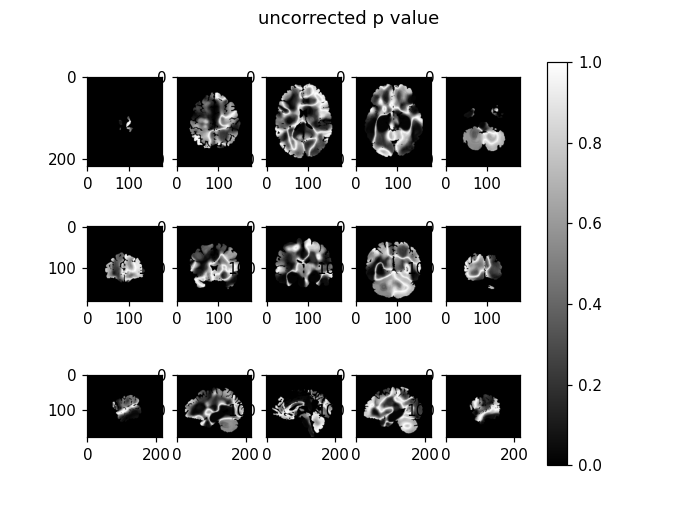

<IPython.core.display.Javascript object>


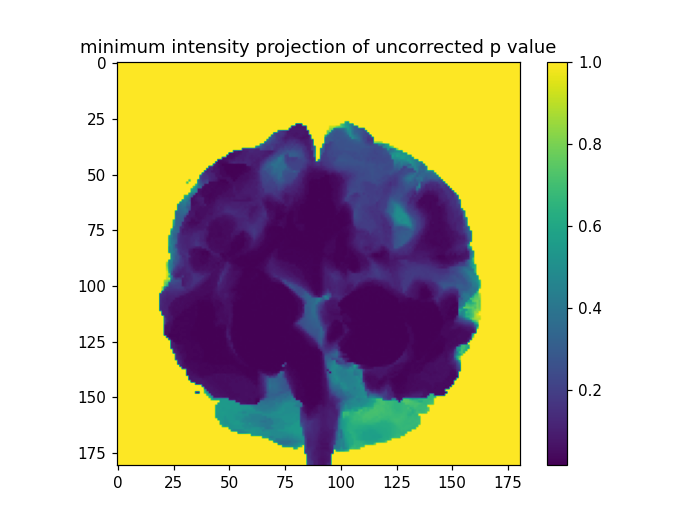

Text(0.5, 1.0, 'minimum intensity projection of uncorrected p value')

In [33]:
fig,ax = draw(Puncorrected[None],cbar=True)
fig.suptitle('uncorrected p value')

fig,ax = plt.subplots()
h = ax.imshow(np.min(Puncorrected + (1-mask),1))
fig.colorbar(h)
ax.set_title('minimum intensity projection of uncorrected p value')

<IPython.core.display.Javascript object>


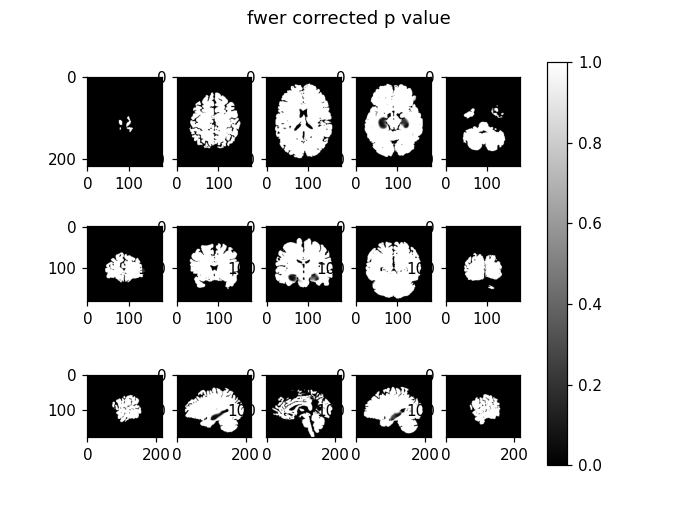

<IPython.core.display.Javascript object>


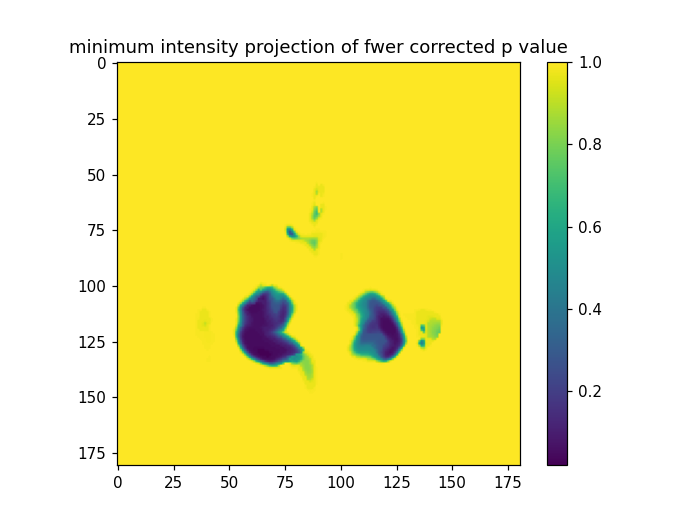

Text(0.5, 1.0, 'minimum intensity projection of fwer corrected p value')

In [34]:
fig,ax = draw(Pfwer[None],cbar=True)
fig.suptitle('fwer corrected p value')

fig,ax = plt.subplots()
h = ax.imshow(np.min(Pfwer + (1-mask),1))
fig.colorbar(h)
ax.set_title('minimum intensity projection of fwer corrected p value')

<IPython.core.display.Javascript object>


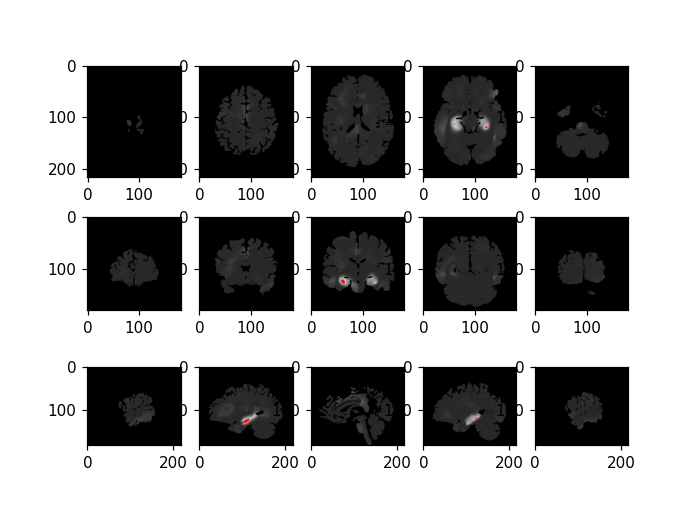

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [35]:
# use our threshold to visualize
RGB = toRGB(Tstar,(Tstar>t)*mask*1.0)
draw(RGB.transpose(-1,0,1,2))

<IPython.core.display.Javascript object>


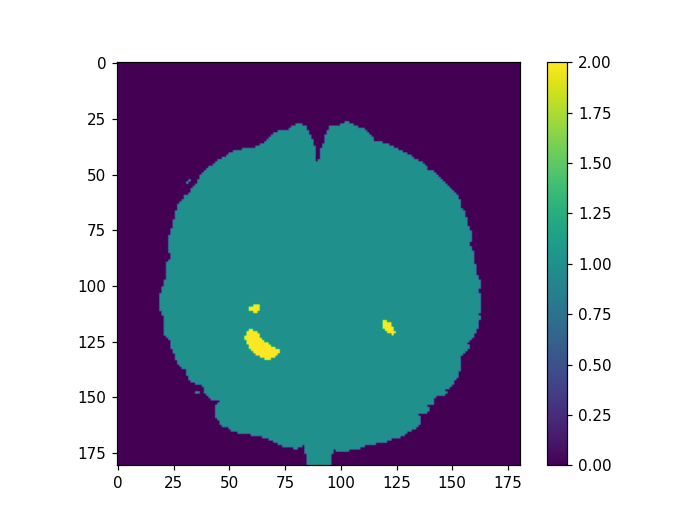

In [36]:
fig,ax = plt.subplots()
h = ax.imshow(np.max(Tstar>t,1)*1.0 + np.max(mask,1))
fig.colorbar(h)
clim = h.get_clim()

<IPython.core.display.Javascript object>


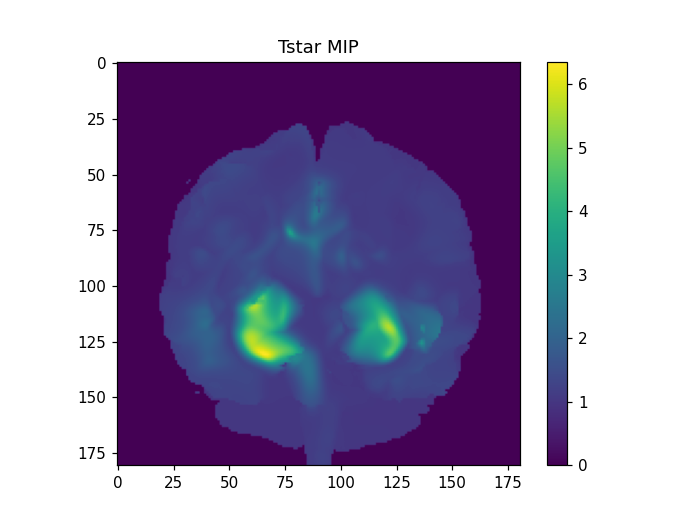

<IPython.core.display.Javascript object>


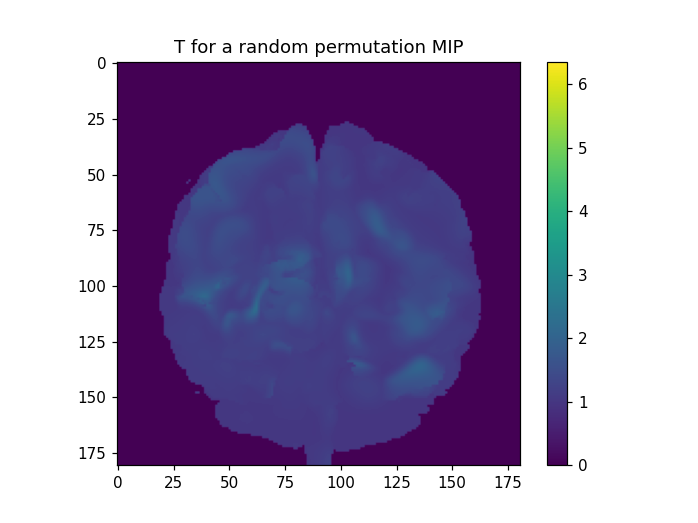

Text(0.5, 1.0, 'T for a random permutation MIP')

In [39]:
# show Tstar again
fig,ax = plt.subplots()
h = ax.imshow(np.max(Tstar,1))
fig.colorbar(h)
clim = h.get_clim()
ax.set_title('Tstar MIP')


# an example of a random one
Gp = np.random.permutation(G)
    
# fit H0
# note that this is the same regardless of permutations
# we could save time by using the value we already calculated
D = np.ones((1,N0+N1))
DD = D@D.T
XD = X@D.T
coeffs = np.linalg.solve(DD,XD[...,None])[...,0]
Xhat = coeffs@D
RMSE0 = np.sqrt(np.mean( (X-Xhat)**2 ,-1))

# fit H1
D = np.stack([np.ones(N0+N1),Gp],0)
DD = D@D.T
XD = X@D.T
coeffs = np.linalg.solve(DD,XD[...,None])[...,0]
Xhat = coeffs@D
RMSE1 = np.sqrt(np.mean( (X-Xhat)**2 ,-1))


Tperm = RMSE0/RMSE1*mask


fig,ax = plt.subplots()
h = ax.imshow(np.max(Tperm,1),clim=clim)
fig.colorbar(h)
ax.set_title('T for a random permutation MIP')